<a href="https://colab.research.google.com/github/donlasSR/WasteClassification-By-cnn/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# กำหนดพาธของข้อมูล
data_path = '/content/drive/MyDrive/data'
class_names = ['glass', 'metal', 'paper', 'plastic', 'waste']  # ปรับตามจำนวนคลาสของคุณ

# สร้างลิสต์สำหรับเก็บข้อมูลภาพและ label
images = []
labels = []

# อ่านข้อมูลภาพจากโฟลเดอร์
for class_index, class_name in enumerate(class_names):
    class_path = os.path.join(data_path, class_name)

    # โหลดภาพจากโฟลเดอร์ของแต่ละคลาส
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        # โหลดและแปลงภาพ
        img = load_img(img_path, target_size=(224, 224))  # ปรับขนาดภาพ
        img_array = img_to_array(img)  # แปลงเป็น array
        images.append(img_array)

        # เพิ่ม label ตามคลาส
        labels.append(class_index)

# แปลงข้อมูลภาพเป็น numpy array
images = np.array(images)
labels = np.array(labels)

# สเกลค่า pixel ของภาพให้อยู่ในช่วง 0-1
images = images / 224.0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, class_names, labels, num_images_per_class=5):
    """
    ฟังก์ชันเพื่อแสดงภาพจากข้อมูลการฝึกแยกตามคลาส
    :param images: ข้อมูลภาพ (เช่น X_train)
    :param class_names: ชื่อของแต่ละคลาส
    :param labels: ป้ายกำกับของภาพ (เช่น y_train) ที่แปลงเป็น one-hot encoding
    :param num_images_per_class: จำนวนภาพที่จะแสดงจากแต่ละคลาส
    """
    plt.figure(figsize=(10, 10))

    # ตรวจสอบว่า labels เป็น one-hot encoding หรือไม่
    if len(labels.shape) == 2:  # one-hot encoding
        class_labels = np.argmax(labels, axis=1)  # แปลง one-hot encoding เป็นค่าคลาส
    else:  # labels เป็นค่าคลาสจริง
        class_labels = labels  # ใช้ labels ตรง ๆ

    # เรียงลำดับภาพตามคลาส
    for class_index in range(len(class_names)):
        # ค้นหาภาพที่มี label ตรงกับ class_index
        class_images = images[class_labels == class_index]

        # แสดงจำนวนภาพตามที่ต้องการจากแต่ละคลาส
        for i in range(min(num_images_per_class, len(class_images))):
            plt.subplot(len(class_names), num_images_per_class, class_index * num_images_per_class + i + 1)
            plt.imshow(class_images[i])
            plt.title(class_names[class_index])
            plt.axis('off')

    plt.show()

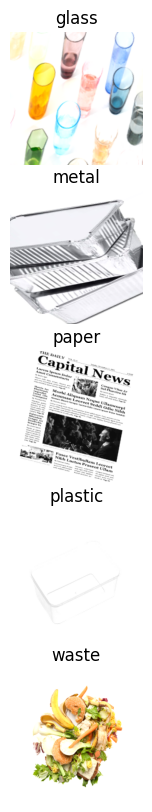

In [ ]:
# เรียกใช้งานฟังก์ชันเพื่อแสดงภาพจาก X_train และ y_train (หรือ images และ labels)
show_images(images, class_names, labels, num_images_per_class=1)

In [ ]:
print(images.shape)

(2250, 224, 224, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))

In [ ]:
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(5, activation='softmax')  # 5 ประเภท
# ])

# # คอมไพล์โมเดล
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',  # ใช้ categorical crossentropy สำหรับหลายคลาส
#               metrics=['accuracy'])

# # แสดงโครงสร้างของโมเดล
# model.summary()

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu',input_shape = (224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = len(class_names), activation = 'softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,908,037 (91.20 MB)

 Trainable params: 23,908,037 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(
    X_train, y_train,  # ข้อมูลฝึก
    epochs=20,  # จำนวน epoch
    batch_size=32,  # ขนาด batch
    validation_data=(X_test, y_test)  # ข้อมูลทดสอบ
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.3294 - loss: 5.6892 - val_accuracy: 0.5000 - val_loss: 1.2275
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.6146 - loss: 0.9810 - val_accuracy: 0.5956 - val_loss: 1.0534
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7651 - loss: 0.6176 - val_accuracy: 0.6222 - val_loss: 1.0262
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8578 - loss: 0.4368 - val_accuracy: 0.6089 - val_loss: 1.1369
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9464 - loss: 0.2150 - val_accuracy: 0.5822 - val_loss: 1.4028
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9407 - loss: 0.2214 - val_accuracy: 0.5867 - val_loss: 1.5727
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9777 - loss: 0.0815 - val_accuracy: 0.5711 - val_loss: 1.9900
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9921 - loss: 0.0476 - val_accuracy: 0.5489 - v

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6495 - loss: 2.4814
Test Loss: 2.831589937210083
Test Accuracy: 0.6066666841506958


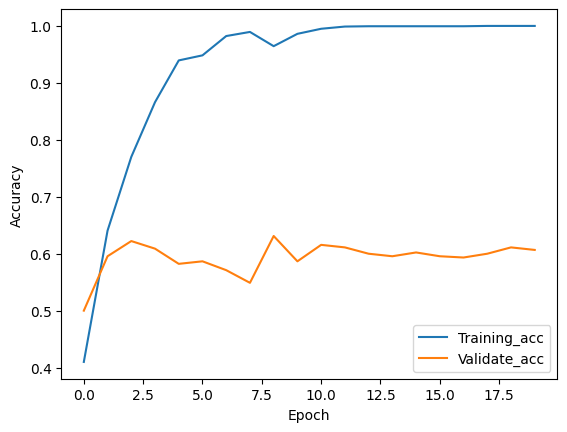

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training_acc', 'Validate_acc'], loc = 'lower right')

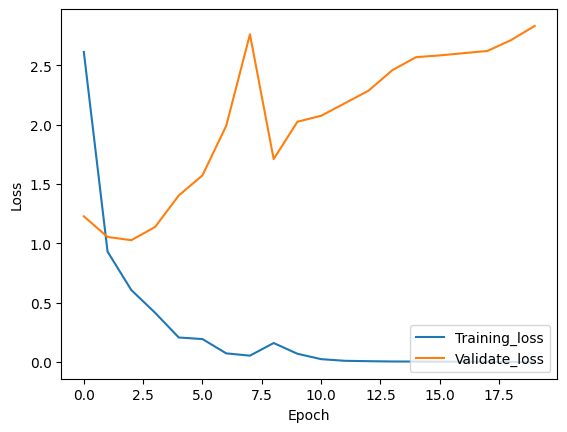

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training_loss', 'Validate_loss'], loc = 'lower right')

In [ ]:
# ทำนายผลจากโมเดล
y_pred = model.predict(X_test)

# แปลงการทำนายให้อยู่ในรูปของคลาส (ค่าที่มีความน่าจะเป็นสูงสุด)
y_pred_classes = np.argmax(y_pred, axis=1)

# แปลง labels ให้เป็นคลาส (ค่าจริง)
y_true_classes = np.argmax(y_test, axis=1)

# คำนวณ confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


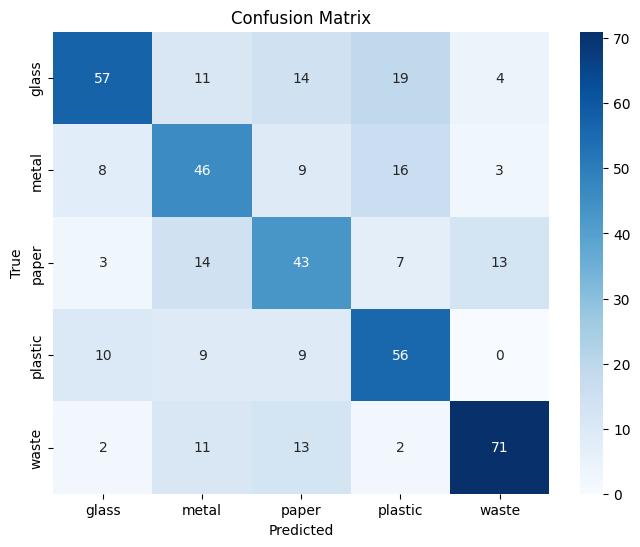

In [ ]:
# แสดง confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()